# Logistic Regression
## Setup

In [1]:
# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time

# load datasets
fifa = np.load('./datasets/fifa.npz')
finance = np.load('./datasets/finance.npz')
orbits = np.load('./datasets/orbits.npz')

## Refactored Functions
Codes for common procedures are refactored into function below for simplicity.

In [2]:
# Train, Test and Evaluate Model
def run_logistic_regression(dataset, learning_rate):
    # load data
    X_train = dataset['train_X']
    Y_train = dataset['classification_train_Y']
    X_test = dataset['test_X']
    Y_test = dataset['classification_test_Y']
    
    # start timer
    start_time = time.time()
    
    # define and train model
    model = SGDClassifier(
        loss='log', # logistic regression
        learning_rate='constant',
        eta0=learning_rate, # learning rate
        early_stopping=True,
        tol=1e-3, # early stop improvement threshold
        n_iter_no_change=5 # early stop consecutive iteration threshold
    )
    model.fit(X_train, Y_train)
    
    # predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # stop timer
    print('Time elapsed for training and predictions: %.3f seconds' % (time.time() - start_time))
    print('\n')

    # evaluate training result
    print('Training set accuracy: %.3f' % accuracy_score(Y_train, Y_train_pred))
    conmat_train = confusion_matrix(Y_train, Y_train_pred)
    plt.title('Training Set: Confusion Matrix')
    sns.heatmap(conmat_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # evaluate testing result
    print('Testing set accuracy: %.3f' % accuracy_score(Y_test, Y_test_pred))
    conmat_test = confusion_matrix(Y_test, Y_test_pred)
    plt.title('Testing Set: Confusion Matrix')
    sns.heatmap(conmat_test, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## FIFA Dataset
### Model Settings
- Learning Rate: 1e-2
- Early Stopping: training is stopped if the prediction accuracy in validation set is not improved by 1e-3 after 5 epochs

Time elapsed for training and predictions: 0.053 seconds


Training set accuracy: 0.851


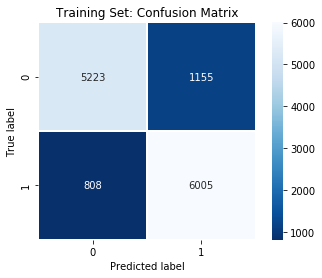

Testing set accuracy: 0.848


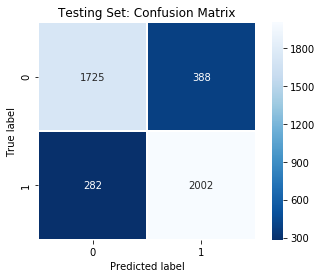

In [3]:
run_logistic_regression(fifa, learning_rate=1e-2)

## Finance Dataset
### Model Settings
- Learning Rate: 1e-1
- Early Stopping: training is stopped if the prediction accuracy in validation set is not improved by 1e-3 after 5 epochs

Time elapsed for training and predictions: 0.013 seconds


Training set accuracy: 0.816


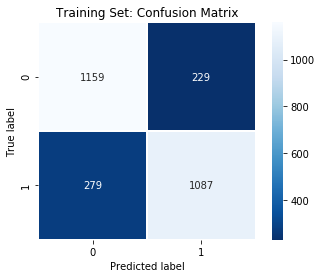

Testing set accuracy: 0.794


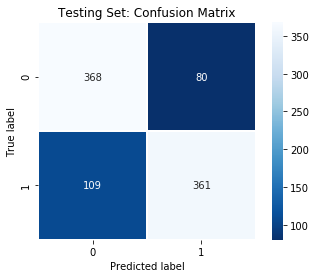

In [4]:
run_logistic_regression(finance, learning_rate=1e-1)

## Orbits Dataset
### Model Settings
- Learning Rate: 1e-1
- Early Stopping: training is stopped if the prediction accuracy in validation set is not improved by 1e-3 after 5 epochs

Time elapsed for training and predictions: 0.011 seconds


Training set accuracy: 0.804


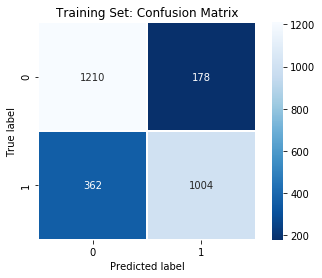

Testing set accuracy: 0.765


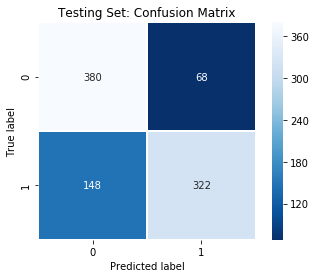

In [5]:
run_logistic_regression(finance, learning_rate=1e-1)